In [20]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

# Introduction and Quick DEMO

This project is splitted into 3 parts:
 - Introduction to Eigenfaces and Quick Demo
 - Preparing the data for the Face Emotion Detector
 - Training the classifier for the Face Emotion Detector
 
 As you can see, we will create 2 programs. The first one will show us what are eigenfaces and how they work. The second one will be a real life scenario program for detecting face emotions. In the second program we will be using large dataset, so keep in mind, that you need to have at least 500mb free space.

### 1. What are Eigenfaces?

In simple words Eigenfaces are a set of `eigenvectors` (principal components) that are derived from the covariance matrix of a set of face images. The eigenvectors correspond to the most significant variations in the set of face images.

In simpler terms, eigenfaces are a method for facial recognition in which a computer program creates a mathematical model of a set of faces. The model consists of a set of characteristic features that are common to all faces in the set, such as the shape and position of the eyes, nose, and mouth. These features are derived from the statistical analysis of a large number of images of faces.

The resulting eigenfaces can then be used to recognize individual faces by comparing them to the model. This technique has been used in a variety of applications, including security systems, computer vision, and robotics.






This may lead to the question - **What are Eigenvectors?**

They are a type of vector in linear algebra that have a special property. When a linear transformation is applied to an eigenvector, the result is a scalar multiple of the original vector. In other words, the direction of the eigenvector is preserved under the transformation, but its length may be scaled by a factor.

For example, if we have a square matrix $ A $ and a vector $ \vec{v} $, if there exists a non-zero vector $ \vec{v} $ that satisfies the equation $ A\vec{v} = \lambda \vec{v} $, where $ \lambda $ is a scalar, then $ \vec{v} $ is an eigenvector of $ A $ and $ \lambda $ is its corresponding eigenvalue.

Eigenvectors and eigenvalues are important in many areas of science and engineering, including physics, computer graphics, and data analysis. In the context of facial recognition using eigenfaces, eigenvectors are used to represent the variations in the images of faces, and the eigenvalues indicate the relative importance of each eigenvector in the representation.

### 2. How are images represented as Eigenvectors

In the context of eigenfaces, images are represented as vectors in a high-dimensional space, where each dimension corresponds to a pixel in the image. The dimensionality of the space is equal to the number of pixels in the images, *which can be quite large for high-resolution images*.



To reduce the dimensionality of the image space, a technique called `Principal Component Analysis (PCA)` is applied. PCA is a statistical method that finds the most significant patterns of variation in a dataset. In the case of eigenfaces, PCA is used to identify the most important features of a set of face images.

To show the power of PCA, we will generate 100 points in 2D space and we will apply Principal Component Analysis on them.

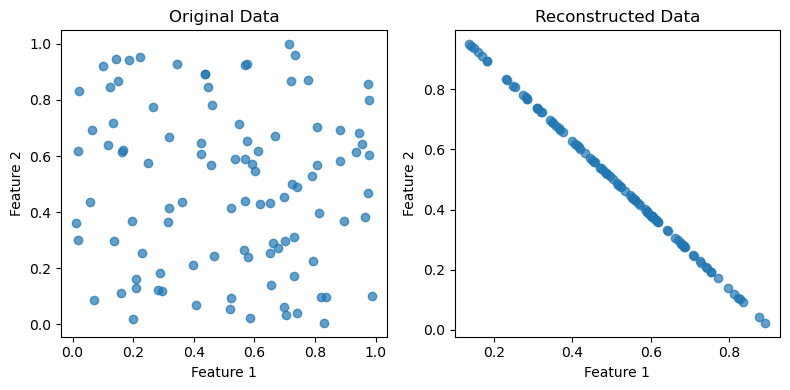

In [2]:
# Generate random data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 data points in 2D space

# Perform PCA
mean = np.mean(X, axis=0)
X_centered = X - mean
covariance = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eigh(covariance)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
pca_components = eigenvectors[:, :1]  # Choose the first principal component

# Project data onto the principal component
X_projected = np.dot(X_centered, pca_components)
X_reconstructed = np.dot(X_projected, pca_components.T) + mean

# Plot original data and reconstructed data
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.7)
plt.title('Reconstructed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In this program, we generate random `2D` data points and then perform PCA to reduce the dimensionality. We select the first principal component and project the data onto it. Finally, we reconstruct the data from the projected values and plot both the original data and the reconstructed data using `matplotlib`.

`PCA`, or `Principal Component Analysis`, is a mathematical technique used to reduce the dimensionality of a dataset while retaining as much information as possible. The technique achieves this by transforming the original data into a new set of variables, called principal components, that capture the most important patterns of variation in the data.

The basic idea behind PCA is to find the directions in which the data varies the most, and then project the data onto these directions. The first principal component is the direction that captures the largest amount of variation in the data, and each subsequent principal component captures as much of the remaining variation as possible.

To perform PCA, we start by computing the covariance matrix of the input data, which describes the statistical relationships between the different dimensions (or variables) of the data. We then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors correspond to the principal components, while the eigenvalues indicate how much variance is explained by each principal component.

The eigenvectors are sorted by their corresponding eigenvalues, with the eigenvector corresponding to the largest eigenvalue being the first principal component, the eigenvector corresponding to the second largest eigenvalue being the second principal component, and so on.

Once we have computed the principal components, we can project the original data onto them to obtain a lower-dimensional representation of the data. This can be useful for data visualization, data compression, and other applications.

Overall, PCA is a powerful technique that can help to identify the most important patterns of variation in complex datasets, and can be used in a wide range of applications, from image processing to finance to genetics.

### 3. Quick Eigenfaces DEMO

Now that we know big part of the theory behind Eigenfaces, we can proceed to a quick little experiment. Everybody uses faces of famous celebritys. But what whould happen if we want to do PCA over an animeted character? For the purpose of this demo, I will be using my favourite character - Gintoki Sakata. We have 10 pictures of him. The experiment is to see is there enough data in the animeted face, and could we use it for Eigenfaces? Sounds fun, right?

In [2]:
# First, we need a function to load all the images of our character
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [3]:
# Then we need a function to preprocess them
def preprocess_images(images):
    processed_images = []
    for img in images:
        img = cv2.resize(img, (100, 100))  # Resize the image if needed
        img = img.flatten()  # Flatten the image into a 1D array
        processed_images.append(img)
    return processed_images

In [4]:
# Then we perform PCA
def perform_pca(images, num_components=10):
    # Preprocess the images
    processed_images = preprocess_images(images)

    # Convert the list of images to a 2D numpy array
    X = np.array(processed_images)

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)

    # Return the PCA-transformed data and the PCA object
    return X_pca, pca

The next piece of code may be quite confusing. After a lot of research, i found out that `Euclidean distance` is commonly used to compare faces because it provides a straightforward and intuitive measure of similarity between two vectors or images. When face images are represented as vectors in a high-dimensional space, the Euclidean distance can capture the overall difference between the vectors.

$$ d(p, q)^2 = (q_{1} - p_{1})^2 + (q_{2} - p_{2})^2 $$

Additionally, Euclidean distance is computationally efficient and easy to implement, making it a popular choice for face recognition tasks. 

However, it's important to note that face recognition is a complex problem, and solely relying on Euclidean distance may have limitations.

We often use the Pythagorean theorem to compute two-dimensional Euclidean distance

![euclidean distance](euclidean_distance.svg)

In [5]:
# We need a function to detect distance between the faces
def calculate_distance(image1, image2):
    return np.linalg.norm(image1 - image2)

In [12]:
# After that, we need a function to detect the faces
def detect_faces(test_images, pca, threshold=5000):
    # Preprocess the test images
    processed_test_images = preprocess_images(test_images)

    # Convert the test images to a 2D numpy array
    X_test = np.array(processed_test_images)

    # Standardize the test data using the same scaler from PCA
    X_test_scaled = pca.transform(X_test)

    # Detect faces
    detected_faces = []
    for i, test_img in enumerate(X_test_scaled):
        min_distance = float('inf')
        detected_face = None
        for j, train_img in enumerate(pca.components_):
            distance = calculate_distance(test_img, train_img)
            if distance < min_distance:
                min_distance = distance
                detected_face = j
        if min_distance < threshold:
            detected_faces.append(detected_face)
        else:
            detected_faces.append(None)
    return detected_faces

In [31]:
# Here are the paths to the folders with all the images
train_folder = 'gintoki_training'  # Folder containing the 10 training images
test_folder = 'gintoki_testing'  # Folder containing the 5 test images

In [68]:
# Load and perform PCA on the training images
train_images = load_images(train_folder)
X_train_pca, pca = perform_pca(train_images, num_components=9)

In [69]:
# Load and detect faces in the test images
test_images = load_images(test_folder)
detected_faces = detect_faces(test_images, pca)

ValueError: operands could not be broadcast together with shapes (9,) (10000,) 

Now, let's see how the Eigenfaces look like based on the training data

IndexError: index 9 is out of bounds for axis 0 with size 9

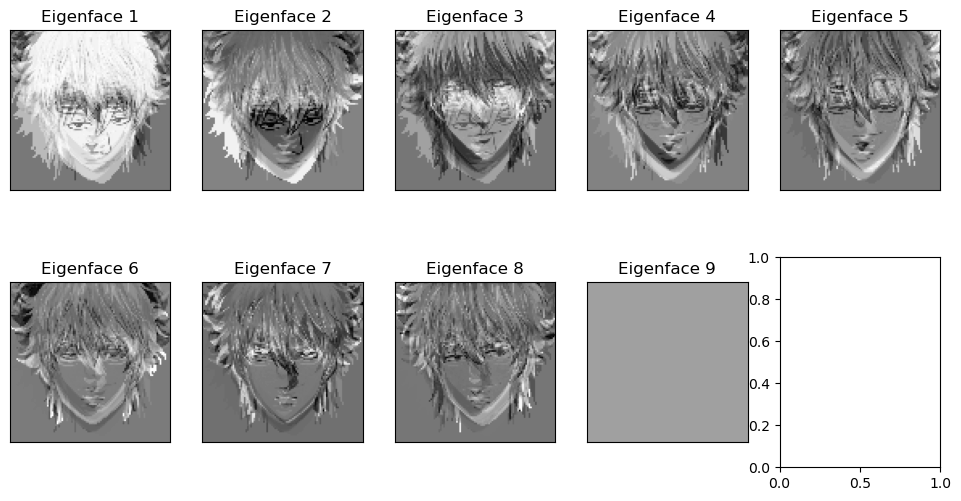

In [25]:
# Define the path to the folder containing Gintoki's images
gintoki_folder = 'gintoki_training'

# Load and perform PCA on the Gintoki images
gintoki_images = load_images(gintoki_folder)
X_gintoki_pca, pca = perform_pca(gintoki_images, num_components=9)

# Plot the blurry eigenfaces
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
axs = axs.flatten()

for i in range(len(axs)):
    eigenface = pca.components_[i].reshape(100, 100)
    axs[i].imshow(eigenface, cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f'Eigenface {i+1}')

plt.tight_layout()
plt.show()

NameError: name 'detected_faces' is not defined

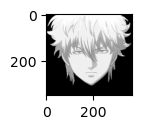

In [70]:
# Display the detected faces
for i, image in enumerate(test_images):
    plt.subplot(1, len(test_images), i + 1)
    plt.imshow(image, cmap='gray')
    if detected_faces[i] is not None:
        plt.title(f'Detected: Gintoki Sakata')
    else:
        plt.title(f'Not Detected')
    plt.axis('off')

plt.show()